
🐶 End-to-end Multil-class Dog Breed Classification

This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub.

1. Problem

Identifying the breed of a dog given an image of a dog.

When I'm sitting at the cafe and I take a photo of a dog, I want to know what breed of dog it is.

2. Data

The data we're using is from Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data

3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

4. Features

Some information about the data:

* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training set (these images have labels).
* There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them).



# Dog Breed Classification

In [0]:
# unzip the data
# !unzip '/content/drive/My Drive/data/dog-breed-identification.zip' -d '/content/drive/My Drive/data/dog_vision'

## Getting our workspace ready
- [x] import tensoflow 2.x
- [x] import tensorflow hub
- [x] make sure we're using GPU

In [2]:
# import tensorflow into colab
import tensorflow as tf

# import tensorflow hub
import tensorflow_hub as hub

# see the version of tf hub
print('Tensorflow hub version ==>', hub.__version__)

# see the version of tensorflow
print('Tensorflow version ==>', tf.__version__)

# check for gpu availability
print('GPU', 'is available :)' if tf.config.list_physical_devices('GPU') else 'is Not available :(')

Tensorflow hub version ==> 0.8.0
Tensorflow version ==> 2.2.0-rc2
GPU is available :)


## Getting our data ready

In [3]:
# Checkout the lables of our data
import pandas as pd
label_csv = pd.read_csv('/content/drive/My Drive/data/dog_vision/labels.csv')
label_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [4]:
# descibe the data
label_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,5c9286aa8acd394e41688b8d4fe105d2,scottish_deerhound
freq,1,126


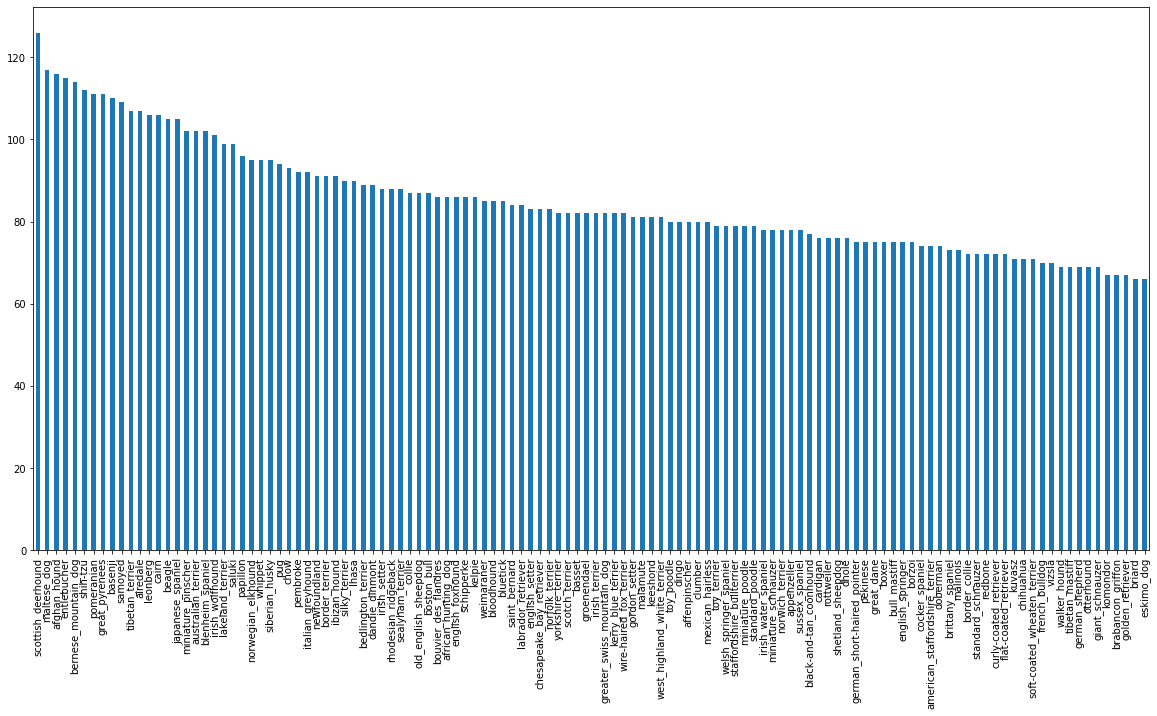

In [5]:
# How many images are there of each breed
label_csv['breed'].value_counts().plot.bar(figsize=(20, 10))

In [6]:
# calculate the average of each class of dog breed
label_csv['breed'].value_counts().median()

82.0

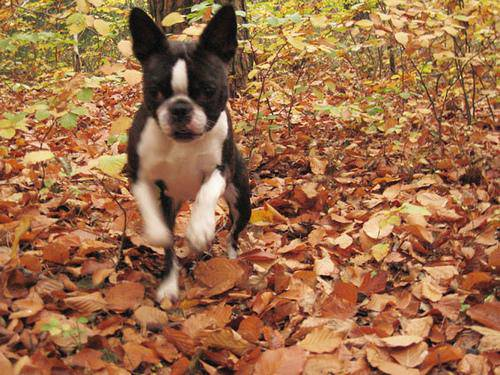

In [7]:
# view image of a dog
from IPython.display import Image
Image('/content/drive/My Drive/data/dog_vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

## Getting images and labels
list of all of our image files path-name

In [8]:
# create a list of all images path
path_list = ['/content/drive/My Drive/data/dog_vision/train/' + fname + '.jpg' for fname in label_csv['id']]

# check the first 10
path_list[:10]

['/content/drive/My Drive/data/dog_vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/My Drive/data/dog_vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/My Drive/data/dog_vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/My Drive/data/dog_vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/My Drive/data/dog_vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/My Drive/data/dog_vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/My Drive/data/dog_vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/My Drive/data/dog_vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/My Drive/data/dog_vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/My Drive/data/dog_vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [9]:
# check number of files we imported
import os
if len(os.listdir('/content/drive/My Drive/data/dog_vision/train')) == len(path_list):
  print('File path match actual amout of data :D')
else:
  print('File path not match actual amout of data :(')

File path match actual amout of data :D


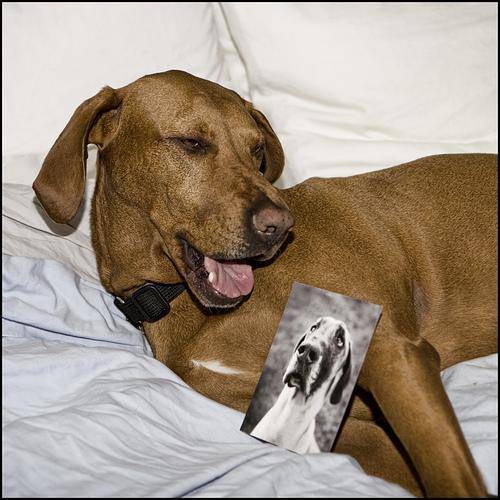

In [10]:
# one more check and see and image
Image(path_list[100])

In [11]:
# check the dog breed in the image
label_csv['breed'][100]

'rhodesian_ridgeback'

## Turn the data into numerical form

In [12]:
# create labels variable and save the breed label in it
labels = label_csv['breed']
labels.head()

0         boston_bull
1               dingo
2            pekinese
3            bluetick
4    golden_retriever
Name: breed, dtype: object

In [13]:
# create numpy array of labels 
import numpy as np
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [14]:
# see the length of labels
len(labels)

10222

In [15]:
# Checking for missing data (check the equal estatement labels and path_list)
if len(path_list) == len(labels):
  print('Length of path_list is equal to labels :)')
else:
  print('Length of path_list is not equal to labels :(')

Length of path_list is equal to labels :)


In [16]:
# find the unique label values
unique_labels = np.unique(labels)
print(len(unique_labels))

120


In [17]:
# Turn a single label into an array of booleans
labels[0] == unique_labels

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [18]:
# Turn every lable into boolean array
boolean_labels = [label == unique_labels for label in labels]
boolean_labels[:4]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [19]:
# Turn boolearn array into integers

# use argmax
print(boolean_labels[0].argmax())
# use astype()
print(boolean_labels[0].astype(int))

19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set

In [0]:
# setup x, y
x = path_list
y = boolean_labels

In [0]:
# strat off experimenting with 1000 images
NUMBER_IMAGES = 1000 #@param {type:'slider', min:1000, max:10000, step:1000}
# set the number of images use @param 

In [0]:
# use train, test and split
from sklearn.model_selection import train_test_split 
x_train, x_valid, y_train, y_valid = train_test_split(x[:NUMBER_IMAGES],
                                                      y[:NUMBER_IMAGES],
                                                      random_state=42,
                                                      test_size=0.2)

In [23]:
# Check the length of splited data
len(x_train), len(y_train), len(x_valid), len(y_valid)

(800, 800, 200, 200)

In [24]:
# show the head of splited data
print(x_train[:2])
print(y_train[:2])

['/content/drive/My Drive/data/dog_vision/train/00bee065dcec471f26394855c5c2f3de.jpg', '/content/drive/My Drive/data/dog_vision/train/0d2f9e12a2611d911d91a339074c8154.jpg']
[array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, 

### Preproccessing Images(turnning images into tensors)

In [25]:
# convert an image into a numpy array
from matplotlib.pyplot import imread
image = imread(path_list[42])
image.shape

(257, 350, 3)

In [26]:
# Check the max and min of image
image.max(), image.min()

(255, 0)

In [27]:
# convert the image into tensors
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

In [0]:
# Define an image size
IMG_SIZE = 224
# define a function to proccess the images
def preproccess(image_path, image_size=IMG_SIZE):
  """
  Takes an image path and turn it to tensors.
  """
  # Read an image file
  image = tf.io.read_file(image_path)
  # Turn into numerical Tensor with 3 color channel
  image = tf.image.decode_jpeg(image, channels=3)
  # convert the color channel values from 0-255 to 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)
  # resize the image to (224, 224)
  image = tf.image.resize(image, size=[image_size, image_size])

  return image

### Turnning our data into batches

In [0]:
# create a function to return (image, label)
def tuple_image_lable(image_path, label):
  """
  takes the image tensors and return a tupple of image data and label
  """
  image = preproccess(image_path)
  return image, label

In [0]:
# Define a batch size 
BATCH_SIZE = 32
# create a function to turn all of our data into batches
def data_batch(x, y, batch_size=BATCH_SIZE, valid_data=False, test_data=False):

  # start with test data
  if test_data:
    print("Creating test data batches ...")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(x))
    data_batch = data.map(preproccess).batch(batch_size)
    return data_batch
  
  # valid data set
  elif valid_data:
    print("Creating valid data batches ...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
    data_batch = data.map(tuple_image_lable).batch(batch_size)
    return data_batch
  
  # train data set
  else:
    print("Creating training data batches ...")

    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
    # shuffle the data
    data = data.shuffle(buffer_size=len(x))
    data_batch = data.map(tuple_image_lable).batch(batch_size)
    return data_batch

In [31]:
# create train and valid data
train_data = data_batch(x_train, y_train)
valid_data = data_batch(x_valid, y_valid, valid_data=True)

Creating training data batches ...
Creating valid data batches ...


In [32]:
# check out the different attribute of our data batches
train_data.element_spec, valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualize our data

In [0]:
# import matplotib
import matplotlib.pyplot as plt

# create a function for viewing images in data batch
def show_25_images(images, labels):
  # setup figure
  plt.figure(figsize=(10, 10))
  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.title(unique_labels[labels[i].argmax()])
    plt.axis('off')

In [0]:
# make the data iterate
train_images, train_labels = next(train_data.as_numpy_iterator())

In [35]:
# check the length of train images
len(train_images), len(train_labels)

(32, 32)

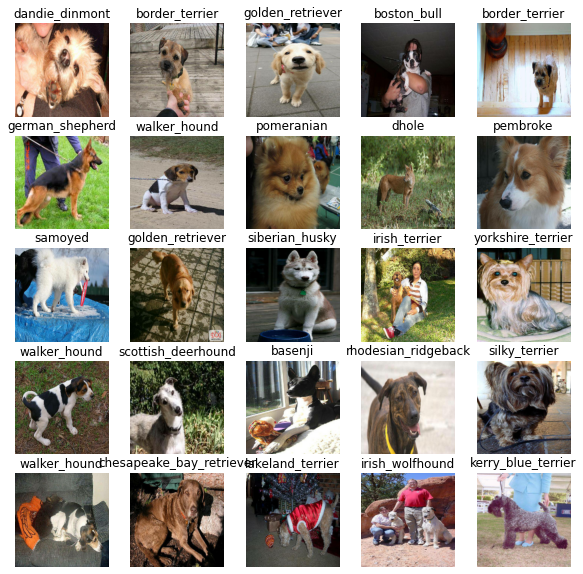

In [36]:
# use visualize function
show_25_images(train_images, train_labels)

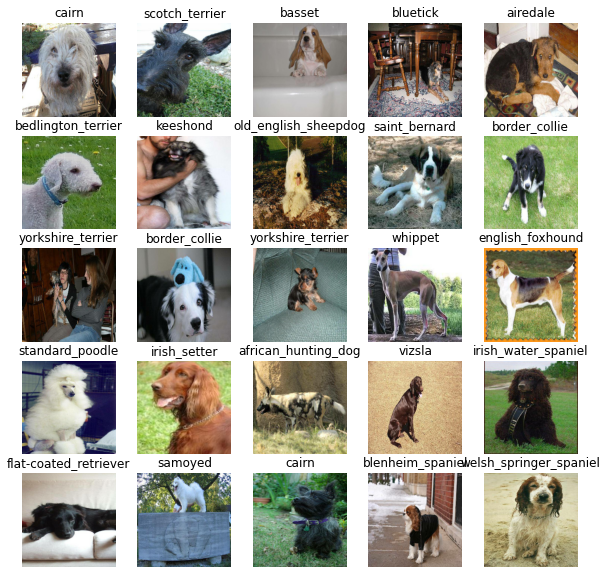

In [37]:
# visualize our validation sets
valid_images, valid_labels = next(valid_data.as_numpy_iterator())
show_25_images(valid_images, valid_labels)

## Building our model

In [0]:
# write our data shape
DATA_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # Batch , height, width, color-channels

# setup the output shape of our model
OUTPUT_SHAPE = len(unique_labels)

# setup model url from tensorflow hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [0]:
# create a model which build a keras model
def create_model(input_shape=DATA_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print('Building a model which:', model_url)

  # setup model layers
  model = tf.keras.Sequential([hub.KerasLayer(model_url), # layer 1 : input layer 
                              tf.keras.layers.Dense(output_shape, activation='softmax'), # layer 2: output layer 
                               ])
  # compile the model
  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
  # build the model
  model.build(input_shape)
  return model

In [41]:
model = create_model()
model.summary()

Building a model which: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________
